In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_excel('https://github.com/ishantg3/DSMM_T2_G3_2024W/blob/main/flight_price.xlsx?raw=true')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


> Before start doing the analysis iI would prefer to do some transformation to have a clean dataset

In [13]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [14]:
# Convert the date columns to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

/tmp/ipykernel_4128/409346238.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [15]:
# Transform Departure Time to Hour and Minute and dropping the original column

df["Dep_hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_min"]=df["Dep_Time"].str.split(":").str[0]
df.drop("Dep_Time", axis=1, inplace=True)

In [16]:
# Transform Arrival Time to Hour and Minute and dropping the original column

df["Arrival_hour"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]
df["Arrival_min"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]
df.drop("Arrival_Time", axis=1, inplace=True)

In [17]:
# Transform Duration to minutes and dropping the original column

df["DurationH"]=df["Duration"].str.split("h").str[0]
df["DurationM"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

df["DurationM"] = pd.to_numeric(df["DurationH"], errors='coerce').fillna(0).astype(int)
df["DurationH"] = pd.to_numeric(df["DurationH"], errors='coerce').fillna(0).astype(int)

df["Duration_minutes"] =  (df["DurationH"] * 60 ) + df["DurationM"] 

# Dropping unnecessary columns
df.drop(["DurationH", "DurationM", "Route", "Duration", "Additional_Info"], axis=1, inplace=True)

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,3897,22,22,01,10,122
1,Air India,2019-01-05,Kolkata,Banglore,2 stops,7662,05,05,13,15,427
2,Jet Airways,2019-09-06,Delhi,Cochin,2 stops,13882,09,09,04,25,1159
3,IndiGo,2019-12-05,Kolkata,Banglore,1 stop,6218,18,18,23,30,305
4,IndiGo,2019-01-03,Banglore,New Delhi,1 stop,13302,16,16,21,35,244


> Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [19]:
df.shape

(10683, 11)

> Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

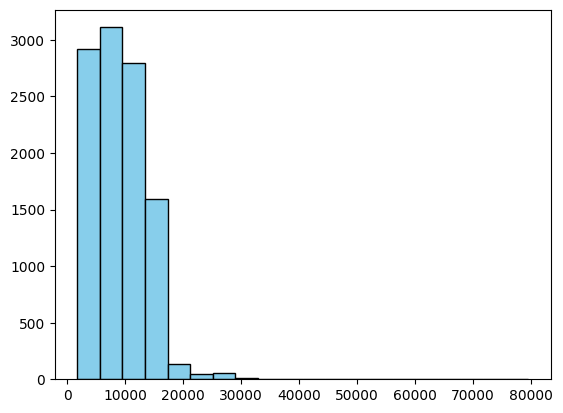

In [20]:
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.show()

> Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [21]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print("The minimun price is: ", min_price, ", and the maximum price is: ",max_price)

The minimun price is:  1759 , and the maximum price is:  79512


> Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines

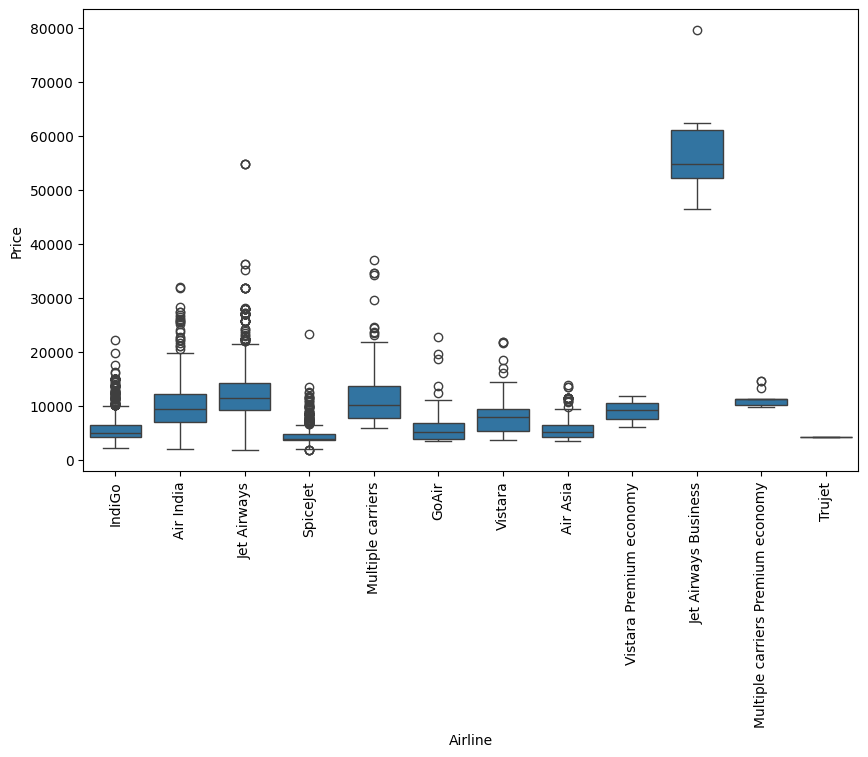

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

> Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

> To answer this question, I'll use the the EMpirical Rule to identify the outliers.  
The Empirical Rule states that for a normal distribution:  
68% of the data falls within one standard deviation of the mean  
95% falls within two standard deviations  
99.7% falls within three standard deviations  


<Axes: >

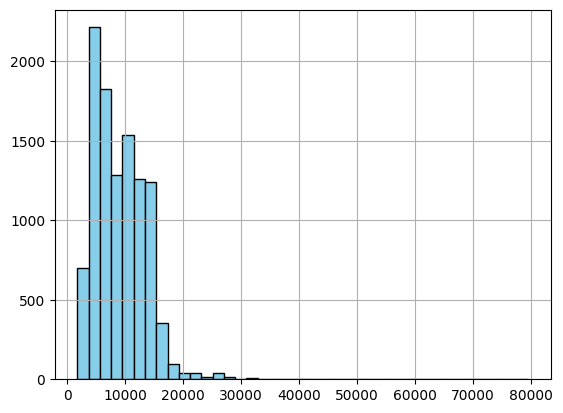

In [23]:
# Lets first identify the shape of the distribution of the prices
df["Price"].hist(bins=40, color='skyblue', edgecolor='black')

> Second, we can compute the actual percentage of values that satisfies the criterion of the empirical rule by finding the mean, and standard deviation, and calculate lower and upper limits for 1, 2 and 3 standard deviations ranges.

In [24]:
col_mean = df["Price"].mean()
col_std = df["Price"].std()

lower_limit = col_mean - (1 * col_std)
upper_limit = col_mean + (1 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 1 std: ", percentage)

lower_limit = col_mean - (2 * col_std)
upper_limit = col_mean + (2 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 2 std: ", percentage)

lower_limit = col_mean - (3 * col_std)
upper_limit = col_mean + (3 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 3 std: ", percentage)


Percentage of data within 1 std:  68.46391463072172
Percentage of data within 2 std:  97.95937470747917
Percentage of data within 3 std:  99.10137601797247


> It seems that the percentage we calculated are near to the criteria.  
> Now let’s calculate the Z-Score. This can be done easily by using the Z-score function from the “stats” module in Scipy, and the filtering the values that are 3 standard deviations far from te mean.

In [25]:
from scipy import stats
df["z_score"] = stats.zscore(df["Price"])
df[(df["z_score"] < -3) | (df["z_score"] > 3)]

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes,z_score
123,Air India,2019-01-03,Delhi,Cochin,1 stop,27430,23,23,19,15,1220,3.977958
396,Multiple carriers,2019-01-03,Delhi,Cochin,1 stop,36983,12,12,19,15,366,6.049679
486,Jet Airways,2019-01-03,Banglore,New Delhi,1 stop,26890,08,08,15,15,366,3.860851
510,Jet Airways,2019-01-03,Banglore,New Delhi,1 stop,26890,07,07,12,25,305,3.860851
597,Air India,2019-06-03,Mumbai,Hyderabad,2 stops,25139,09,09,15,15,1769,3.481118
...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,2019-06-03,Mumbai,Hyderabad,2 stops,24210,19,19,16,50,1281,3.279650
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,1 stop,57209,09,09,14,25,244,10.436010
10383,Jet Airways,2019-01-03,Banglore,New Delhi,1 stop,26890,07,07,05,05,1342,3.860851
10439,Jet Airways,2019-01-03,Banglore,New Delhi,1 stop,31825,18,18,09,00,854,4.931084


In [26]:
# Dropping values with z-score > 3
df_new = df[(df["z_score"] > -3) & (df["z_score"] < 3)]
df_new[(df_new["z_score"] < -3) | (df_new["z_score"] > 3)]

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes,z_score


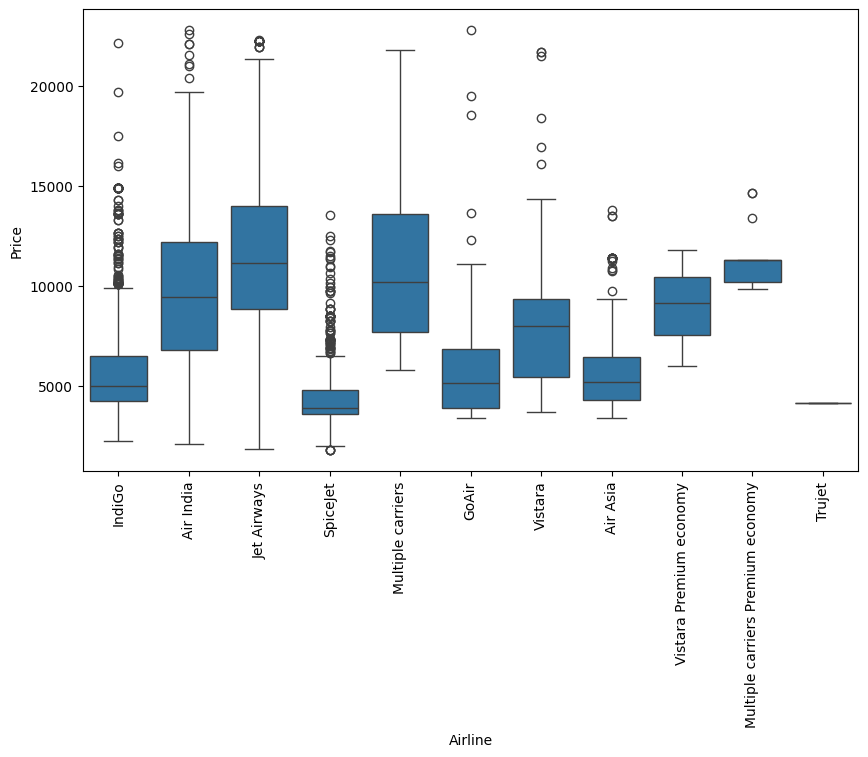

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_new, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

> Finally, I found that what I thought it was an outlier, is actually a valid price, so I will not drop any value

> Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

> A: I could check the distribution of trips amid quarters.

In [28]:
df['Year'] = df['Date_of_Journey'].dt.year
df['Quarter'] = df['Date_of_Journey'].dt.quarter

subset = df.groupby(['Year', 'Quarter']).size().reset_index(name='Total Travels')
subset.head()


,Year,Quarter,Total Travels
0,2019,1,3286
1,2019,2,5034
2,2019,3,1406
3,2019,4,957


> After evaluating, I could identify that there are just records of trips belonging to months from January to June. I this case, one possible solution is to check by month.

In [29]:
df['Month'] = df['Date_of_Journey'].dt.strftime('%B')
subset = df.groupby(['Year', 'Month']).size().reset_index(name='Total Travels')
subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)
subset.head()

,Year,Month,Total Travels
2,2019,January,1075
4,2019,March,2211
0,2019,April,424
5,2019,May,2074
3,2019,June,2536


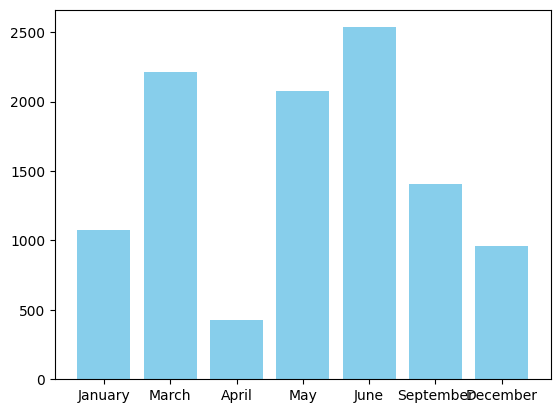

In [30]:

plt.bar(subset['Month'], subset['Total Travels'], color='skyblue')
plt.show()

> Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

> A: First, I could create a subset grouping by Airline and getting the average value.  
Then, I could do the same but by month

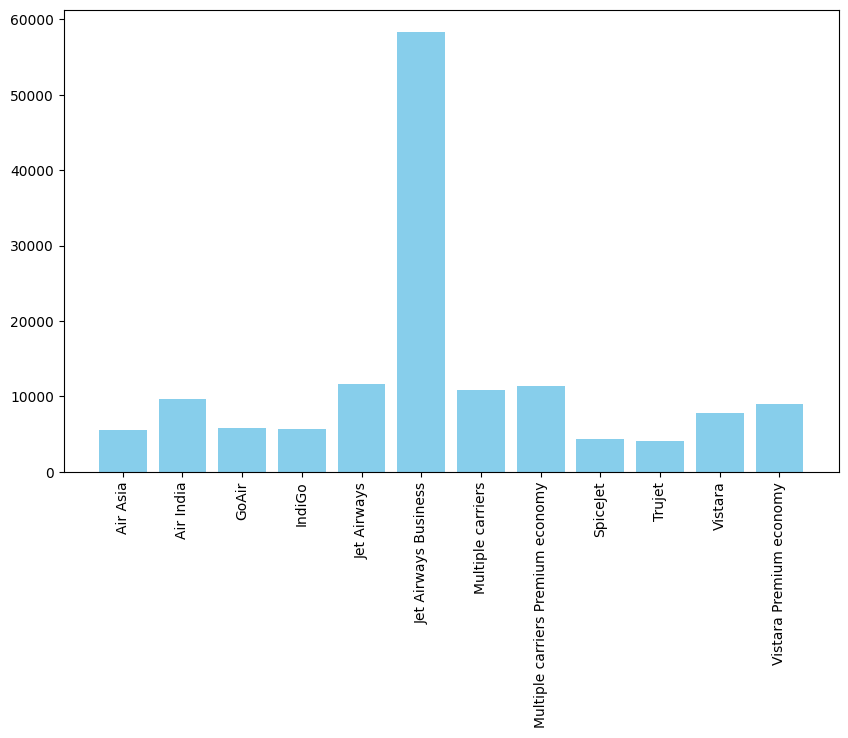

In [31]:
# Analizing trends in prices by airline and month
subset = df.groupby('Airline').agg({'Price': 'mean'}).reset_index()
# subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)

plt.figure(figsize=(10,6))
plt.bar(subset['Airline'], subset['Price'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

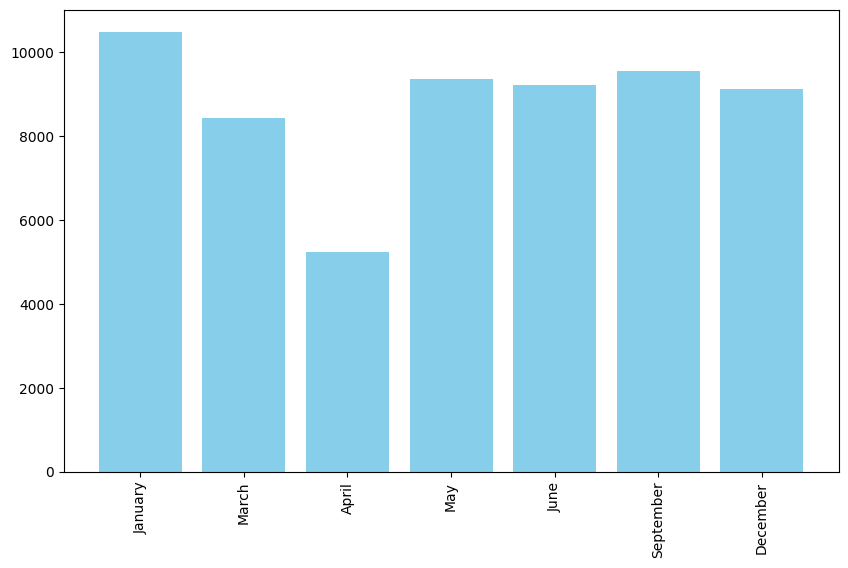

In [32]:
# Analizing trends in prices by month
subset = df.groupby('Month').agg({'Price': 'mean'}).reset_index()
subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)

plt.figure(figsize=(10,6))
plt.bar(subset['Month'], subset['Price'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

> Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?  

> A: To see if there are factors affecting flight prices I could plot a scatter for pair of features like Price-Duration.

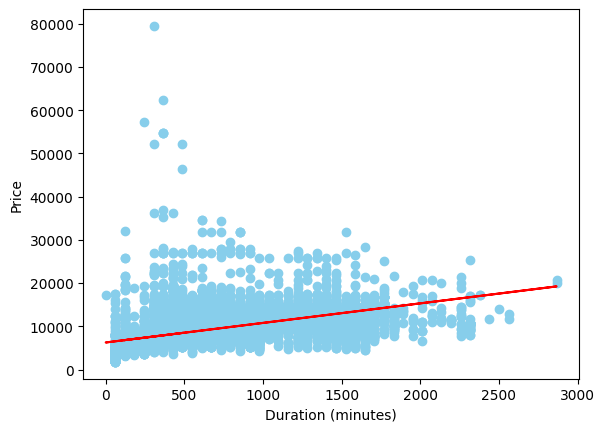

The correlation between price and duration is:  0.5086722015237886


In [33]:
import numpy as np
# Calculate the coefficients of the polynomial regression line
coefficients = np.polyfit(df['Duration_minutes'], df['Price'], 1)

# Create a polynomial function based on the coefficients
trend_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(df['Duration_minutes'], df['Price'], color='skyblue')

# Plot the trend line
plt.plot(df['Duration_minutes'], trend_line(df['Duration_minutes']), color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

# Calculating Pearson correlation coefficient between price and duration of the flight
correlation = df['Duration_minutes'].corr(df['Price'])
print("The correlation between price and duration is: ", correlation)


> The Pearson correlation coefficient is 0.506, which indicates a moderate positive correlation between the duration of the flight and the price. This means that as the duration of the flight increases, the price also increases, and vice versa.
